# Subject: Classical Data Analysis

## Session 4 - Working with Geopandas and ArcGIS Online

### Demo 3 -  Spatial and non-spatial manipulation in Geopandas

pip install -U pysal

PySAL is an open source library of spatial analysis functions written in Python intended to support the development of high level applications. 

http://pysal.readthedocs.io/en/latest/

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps

We will deal with the geography of Liverpool. In particular we will use Census geographies (Available as part of the Census Data pack used before, https://data.cdrc.ac.uk/dataset/cdrc-2011-census-data-packs-for-local-authority-district-liverpool-e08000012) and Ordnance Survey geospatial data, available to download also from the CDRC data store (https://data.cdrc.ac.uk/dataset/cdrc-2015-os-geodata-pack-liverpool-e08000012). 

In the United Kingdom, the Office for National Statistics maintains a series of codes to represent a wide range of geographical areas of the UK, for use in tabulating census and other statistical data. 

https://en.wikipedia.org/wiki/ONS_coding_system

- Census Output Area (OA)
- Lower layer Super Output Area (LSOA)
- Middle layer Super Output Area (MSOA)

To make the rest of the notebook easier to follow, let us set the paths to the main two folders here. We will call the path to the Liverpool Census pack lcp_dir, and that to the OS geodata los_dir:

In [43]:
lcp_dir = 'C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Classical Data Analysis/Session_4_CDA/Liverpool/'

los_dir = 'C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Classical Data Analysis/Session_4_CDA/E08000012/'

# 1. Mapping in Python with geopandas

## 1.1. Loading up spatial data

- Polygons

Let us begin with the most common type of spatial data in the social science: polygons. For example, we can load the geography of Lower layer Super Output Area (LSOA), Middle layer Super Output Area (MSOA) and Census Output Area (OA) in Liverpool with the following lines of code:

Add the shapefile "Lower layer Super Output Area (LSOA)" as GeoPandasDataFrame:

In [44]:
lsoas_link = lcp_dir + 'shapefiles/Liverpool_lsoa11.shp'
lsoas = gpd.read_file(lsoas_link)

Now lsoas is a GeoDataFrame. Very similar to a traditional, non-spatial DataFrame, but with an additional column called geometry:

Check the type of an object:

In [45]:
type(lsoas)

geopandas.geodataframe.GeoDataFrame

Shape of the GeoDataFrame:

In [46]:
lsoas.shape 

(298, 2)

In [47]:
lsoas.head()

LSOA11CD                                           geometry
0  E01006512  POLYGON ((336103.358 389628.58, 336103.416 389...
1  E01006513  POLYGON ((335173.781 389691.538, 335169.798 38...
2  E01006514  POLYGON ((335495.676 389697.267, 335495.444 38...
3  E01006515  POLYGON ((334953.001 389029, 334951 389035, 33...
4  E01006518  POLYGON ((335354.015 388601.947, 335354 388602...

Check the coordinate reference system (CRS) of the GeoDataFrame:

In [48]:
lsoas.crs

{'datum': 'OSGB36',
 'k': 0.9996012717,
 'lat_0': 49,
 'lon_0': -2,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 400000,
 'y_0': -100000}

http://spatialreference.org/ref/epsg/osgb-1936-british-national-grid/

This allows us to quickly produce a plot by executing the following line:

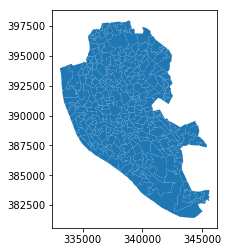

In [49]:
lsoas.plot()

This might not be the most aesthetically pleasant visual representation of the LSOAs geography, but it is hard to argue it is not quick to produce. We will work on styling and customizing spatial plots later on.

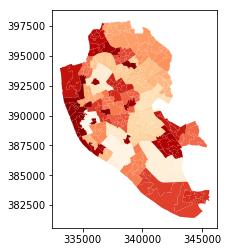

In [50]:
lsoas.plot(column='LSOA11CD', cmap='OrRd')

Note: Matplotlib colormaps: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

Pro-tip: if you call a single row of the geometry column, it'll return a small plot ith the shape:

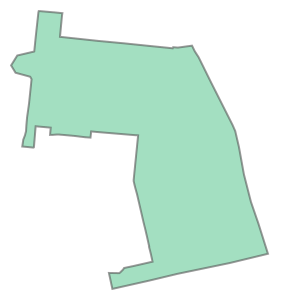

In [51]:
lsoas.loc[0, 'geometry']

Add the shapefile "Middle layer Super Output Area (MSOA)" as GeoPandasDataFrame:

In [52]:
msoas_link = lcp_dir + 'shapefiles/Liverpool_msoa11.shp'
msoas = gpd.read_file(msoas_link)

In [53]:
msoas.shape 

(61, 2)

In [54]:
msoas.head()

MSOA11CD                                           geometry
0  E02001347  POLYGON ((338999.3342917383 397825.6095224405,...
1  E02001348  POLYGON ((337200.9158580635 397743.348530364, ...
2  E02001349  POLYGON ((336353.8722732746 397231.4150898871,...
3  E02001350  POLYGON ((340682.7063253062 396894.9911535739,...
4  E02001351  POLYGON ((337703.2206265313 397613.9456502434,...

In [55]:
msoas.crs

{'datum': 'OSGB36',
 'k': 0.9996012717,
 'lat_0': 49,
 'lon_0': -2,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 400000,
 'y_0': -100000}

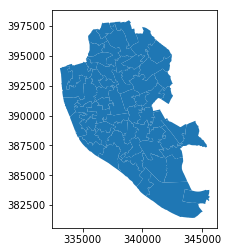

In [56]:
msoas.plot()

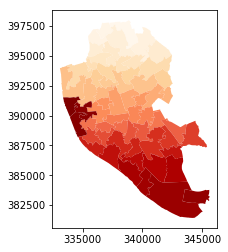

In [57]:
msoas.plot(column='MSOA11CD', cmap='OrRd')

Add the shapefile "Census Output Area (OA)" as GeoPandasDataFrame:

In [58]:
oas_link = lcp_dir + 'shapefiles/Liverpool_oa11.shp'
oas = gpd.read_file(oas_link)

In [59]:
oas.shape 

(1584, 2)

In [60]:
oas.head()

OA11CD                                           geometry
0  E00033384  POLYGON ((339450.699 387542.318, 339447.786 38...
1  E00033305  POLYGON ((341174.685 391644.621, 341175.019 39...
2  E00033833  POLYGON ((336536.999 388587, 336538 388582, 33...
3  E00034020  POLYGON ((339664.22 391858.151, 339657.689 391...
4  E00176725  POLYGON ((334818.797 389226.574, 334828 389211...

In [61]:
oas.crs

{'datum': 'OSGB36',
 'k': 0.9996012717,
 'lat_0': 49,
 'lon_0': -2,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 400000,
 'y_0': -100000}

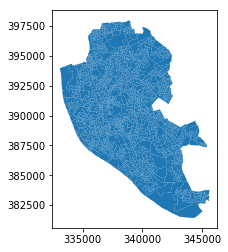

In [62]:
oas.plot()

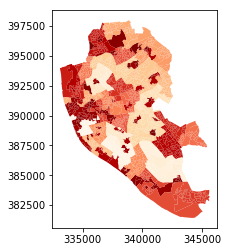

In [63]:
oas.plot(column='OA11CD', cmap='OrRd')

- Lines

Displaying lines is as straight-forward as polygons. To load railway tunnels in Liverpool and name the rows after the id column (or to "index" them):

In [64]:
rwy_tun = gpd.read_file(los_dir + 'RailwayTunnel.shp')
rwy_tun = rwy_tun.set_index('id')
rwy_tun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 44 entries, 0ACD196C321E4F8DE050A00A568A6F6F to 0ACD196C313D4F8DE050A00A568A6F6F
Data columns (total 2 columns):
featcode    44 non-null float64
geometry    44 non-null object
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [65]:
rwy_tun.crs

{'init': 'epsg:27700'}

http://spatialreference.org/ref/epsg/osgb-1936-british-national-grid/

Note how, similarly to the polygon case, if we pick the "geometry" column of a table with lines, a single row will display the geometry as well:

In [66]:
rwy_tun.head()

featcode  \
id                                           
0ACD196C321E4F8DE050A00A568A6F6F   15303.0   
0ACD196C321F4F8DE050A00A568A6F6F   15303.0   
0ACD196C32204F8DE050A00A568A6F6F   15303.0   
0ACD196C32214F8DE050A00A568A6F6F   15303.0   
0ACD196C32264F8DE050A00A568A6F6F   15303.0   

                                                                           geometry  
id                                                                                   
0ACD196C321E4F8DE050A00A568A6F6F  LINESTRING (333935.06 390059.48, 333356.363398...  
0ACD196C321F4F8DE050A00A568A6F6F  LINESTRING (334337.39 390481.53, 334327.57 390...  
0ACD196C32204F8DE050A00A568A6F6F  LINESTRING (334332.51 390283.66, 334264.38 390...  
0ACD196C32214F8DE050A00A568A6F6F  LINESTRING (333965.82 391116.37, 334028.32 391...  
0ACD196C32264F8DE050A00A568A6F6F  LINESTRING (334337.39 390481.53, 334307.81 390...

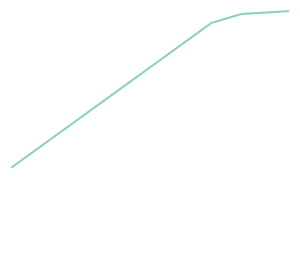

In [67]:
rwy_tun.loc['0ACD196C32204F8DE050A00A568A6F6F', 'geometry']

Note how we have also indexed the table on the id column.
A quick plot is similarly generated by (mind that because there are over 18,000 segments, this may take a little bit):

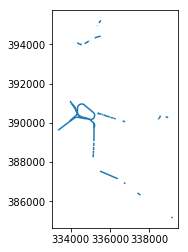

In [68]:
rwy_tun.plot()

- Points

Finally, points follow a similar structure. If we want to represent named places in Liverpool:

In [69]:
namp = gpd.read_file(los_dir + 'NamedPlace.shp')
namp.head()

id        distname        htmlname  \
0  0EE7A103C03A8FBFE050A00A568A2502     Sugar Brook     Sugar Brook   
1  0EE7A104A4B68FBFE050A00A568A2502  Sandfield Park  Sandfield Park   
2  0EE7A1041DB18FBFE050A00A568A2502  Sandfield Park  Sandfield Park   
3  0EE7A1041DE48FBFE050A00A568A2502        Gillmoss        Gillmoss   
4  0EE7A1041DE58FBFE050A00A568A2502        Croxteth        Croxteth   

        classifica fontheight  orientatio  featcode               geometry  
0      Hydrography      Small        25.0   15804.0  POINT (339605 396261)  
1        Landcover      Small         0.0   15805.0  POINT (339758 392357)  
2  Populated Place     Medium         0.0   15801.0  POINT (339768 392217)  
3  Populated Place     Medium         0.0   15801.0  POINT (340269 396567)  
4  Populated Place     Medium         0.0   15801.0  POINT (340296 395304)

In [70]:
namp.crs

{'init': 'epsg:27700'}

And the plot is produced by running:

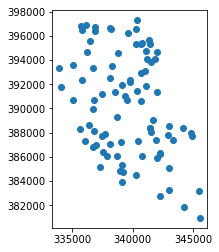

In [71]:
namp.plot()

## 1.2. Styling plots

It is possible to tweak several aspects of a plot to customize if to particular needs. In this section, we will explore some of the basic elements that will allow us to obtain more compelling maps.

- Changing transparency

The intensity of color of a polygon can be easily changed through the alpha attribute in plot. This is specified as a value betwee zero and one, where the former is entirely transparent while the latter is the fully opaque (maximum intensity):

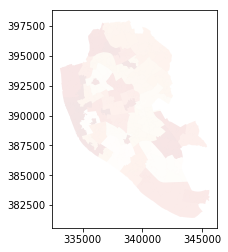

In [72]:
lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=0.1)

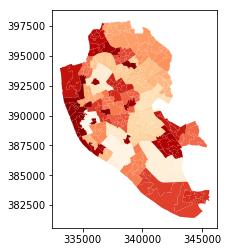

In [73]:
lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1)

- Removing axes

Although in some cases, the axes can be useful to obtain context, most of the times maps look and feel better without them. Removing the axes involves wrapping the plot into a figure, which takes a few more lines of aparently useless code but that, in time, it will allow you to tweak the map further and to create much more flexible designs:

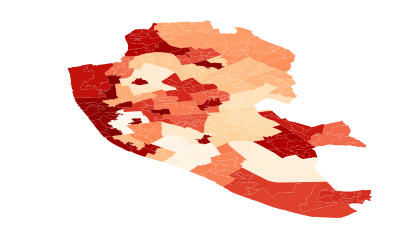

In [74]:
f, ax = plt.subplots(1)
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1, ax=ax)
ax.set_axis_off()
plt.show()

We have first created a figure named f with one axis named ax by using the command plt.subplots (part of the library matplotlib, which we have imported at the top of the notebook). Note how the method is returning two elements and we can assign each of them to objects with different name (f and ax) by simply listing them at the front of the line, separated by commas.

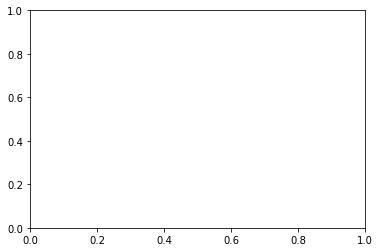

In [75]:
f, ax = plt.subplots(1) 

Second, we plot the geographies as before, but this time we tell the function that we want it to draw the polygons on the axis we are passing, ax. This method returns the axis with the geographies in them, so we make sure to store it on an object with the same name, ax.

In [76]:
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1, ax=ax)

On the third line, we effectively remove the box with coordinates.

In [77]:
ax.set_axis_off()


Finally, we draw the entire plot by calling plt.show().

In [78]:
plt.show()

- Adding a title

Adding a title is a simple extra line, if we are creating the plot within a figure, as we just did. To include text on top of the figure:

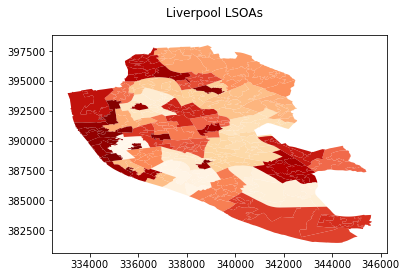

In [79]:
f, ax = plt.subplots(1)
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1, ax=ax)
f.suptitle('Liverpool LSOAs')
plt.show()

- Changing the size of the map

The size of the plot is changed equally easily in this context. The only difference is that it is specified when we create the figure with the argument figsize. The first number represents the width, the X axis, and the second corresponds with the height, the Y axis.

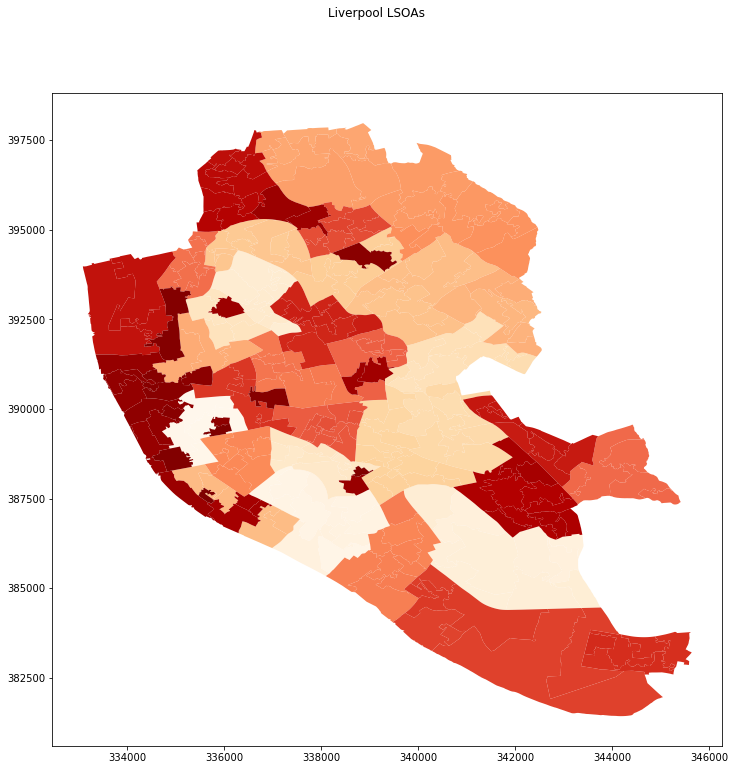

In [80]:
f, ax = plt.subplots(1,  figsize=(12, 12))
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1, ax=ax)
f.suptitle('Liverpool LSOAs')
plt.show()

- Modifying borders

Border lines sometimes can distort or impede proper interpretation of a map. In those cases, it is useful to know how they can be modified. Although not too complicated, the way to access borders in geopandas is not as straightforward as it is the case for other aspects of the map, such as size or frame. Let us first see the code to make the lines thinner and grey, and then we will work our way through the different steps:

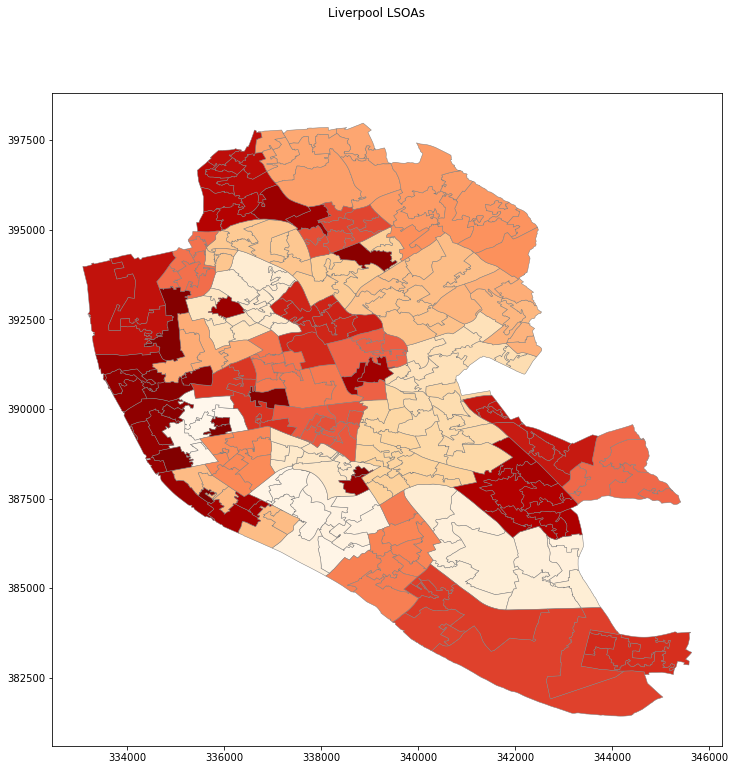

In [81]:
f, ax = plt.subplots(1,  figsize=(12, 12))
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1,  linewidth=0.5, edgecolor='grey', ax=ax)
f.suptitle('Liverpool LSOAs')
plt.show()

## 1.3. Transforming CRS

The coordindate reference system (CRS) is the way geographers and cartographers have to represent a three-dimentional object, such as the round earth, on a two-dimensional plane, such as a piece of paper or a computer screen. If the source data contain information on the CRS of the data, it is very easy to modify this in a GeoDataFrame. First let us check if we have the information stored properly:

In [82]:
lsoas.crs

{'datum': 'OSGB36',
 'k': 0.9996012717,
 'lat_0': 49,
 'lon_0': -2,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 400000,
 'y_0': -100000}

As we can see, there is information stored about the reference system: it is using the datum "OSGB36", which is a projection in meters (m in units). There are also other less decipherable parameters but we do not need to worry about them right now.

If we want to modify this and "reproject" the polygons into a different CRS, the easiest way is to find the EPSG code online (epsg.io is a good one, although there are others too). For example, if we wanted to transform the dataset into lat/lon coordinates, we would use its EPSG code, 4326:

https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers#European_Petroleum_Survey_Group

http://epsg.io/

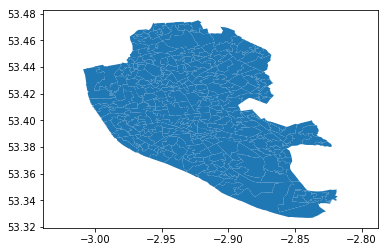

In [83]:
lsoas.to_crs(epsg=4326).plot()
lims = plt.axis('equal')

Because the area we are visualizing is not very large, the shape of the polygons is roughly the same. However, note how the scale in which they are plotted differs: while before we had coordinate points ranging 332,000 to 398,000, now these are expressed in degrees, and range from -3.05 to -2,80 on the longitude, and between 53.32 and 53.48 on the latitude.

In [84]:
lsoas_rep = lsoas.to_crs({'init': 'epsg:4326'})

In [85]:
lsoas.crs

{'datum': 'OSGB36',
 'k': 0.9996012717,
 'lat_0': 49,
 'lon_0': -2,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 400000,
 'y_0': -100000}

In [86]:
lsoas_rep.crs

{'init': 'epsg:4326'}

## 1.4. Saving maps to figures

Once we have produced a map we are content with, we might want to save it to a file so we can include it into a report, article, website, etc. Exporting maps in Python is as simple as replacing plt.show by plt.savefig at the end of the code block to specify where and how to save it. For example to save the previous map into a png file in the same folder where the notebook is hosted:

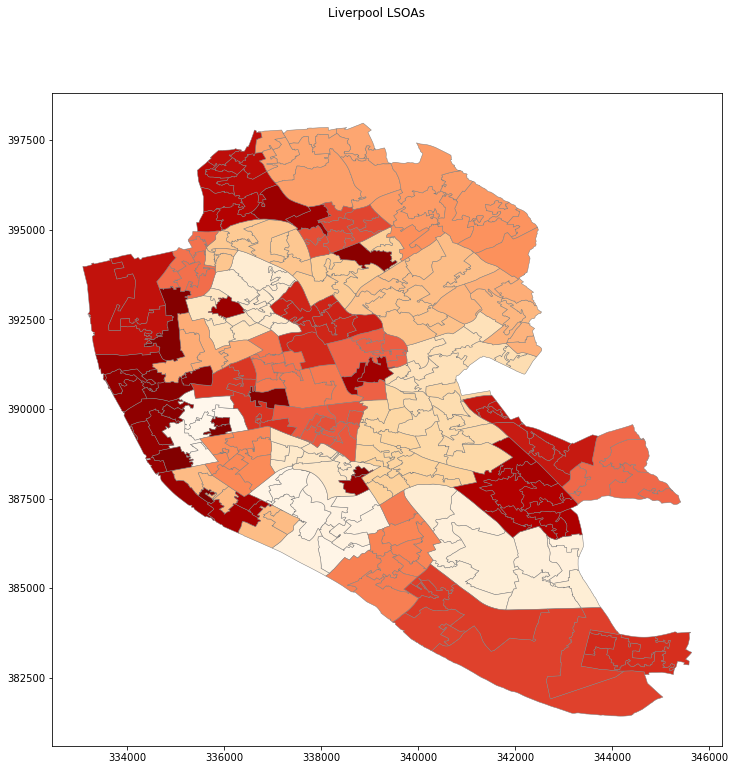

In [87]:
f, ax = plt.subplots(1,  figsize=(12, 12))
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1,  linewidth=0.5, edgecolor='grey', ax=ax)
f.suptitle('Liverpool LSOAs')
plt.savefig('Liverpool LSOA.png')

If you now check on the folder, you'll find a png (image) file with the map.

The command plt.savefig contains a large number of options and additional parameters to tweak. Given the size of the figure created is not very large, we can increase this with the argument dpi, which stands for "dots per inch" and it's a standard measure of resolution in images. For example, for a high definition (HD) quality image, we can use 1080.

Note: if this takes too long, try with 500 instead, which will still give you a good quality image that renders more easily.

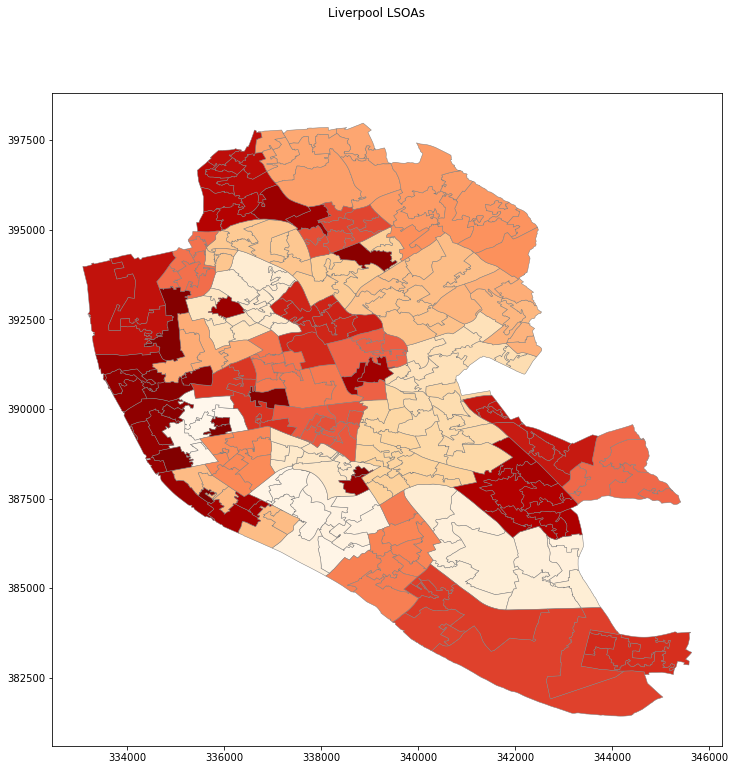

In [88]:
f, ax = plt.subplots(1,  figsize=(12, 12))
ax = lsoas.plot(column='LSOA11CD', cmap='OrRd', alpha=1,  linewidth=0.5, edgecolor='grey', ax=ax)
f.suptitle('Liverpool LSOAs')
plt.savefig('Liverpool LSOA2.png', dpi=1080)

## 2. Manipulating spatial tables (GeoDataFrames)

Once we have an understanding of how to visually display spatial information contained, let us see how it can be combined with the operations learnt in the previous session about manipulating non-spatial tabular data. Essentially, the key is to realize that a GeoDataFrame contains most of its spatial information in a single column named geometry, but the rest of it looks and behaves exactly like a non-spatial DataFrame (in fact, it is). This concedes them all the flexibility and convenience that we saw in manipulating, slicing, and transforming tabular data, with the bonus that spatial data is carried away in all those steps. In addition, GeoDataFrames also incorporate a set of explicitly spatial operations to combine and transform data. In this section, we will consider both.

Let us refresh some of the techniques we learned in the previous session about non-spatial tabular data and see how those can be combined with the mapping of their spatial counter-parts. To do this, we will explore the population data:

In [89]:
import pandas as pd

# Set the path to the location of the Liverpool Census Data-Pack
path = 'C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Classical Data Analysis/Session_4_CDA/Liverpool/'

Remember the data we want need to be extracted and renamed for the variables to have human readable names. 

Read original table:

In [90]:
lsoa_orig = pd.read_csv(path+'tables/QS203EW_lsoa11.csv', index_col='GeographyCode')

In [91]:
lsoa_orig.head()

QS203EW0001  QS203EW0002  QS203EW0003  QS203EW0004  \
GeographyCode                                                       
E01006512             1880          910          766          699   
E01006513             2941         2225         2033         1806   
E01006514             2108         1786         1632         1503   
E01006515             1208          974          910          877   
E01006518             1696         1531         1468         1446   

               QS203EW0005  QS203EW0006  QS203EW0007  QS203EW0008  \
GeographyCode                                                       
E01006512               26           21           20            0   
E01006513               98           28          101            0   
E01006514               44           18           67            0   
E01006515               16            5           12            0   
E01006518                7            6            9            0   

               QS203EW0009  QS203EW0010     ...       QS203EW0069  \
GeographyCode                               ...                     
E01006512                0            0     ...                 5   
E01006513                0            0     ...                 5   
E01006514                0            0     ...                19   
E01006515                0            0     ...                 4   
E01006518                0            0     ...                 3   

               QS203EW0070  QS203EW0071  QS203EW0072  QS203EW0073  \
GeographyCode                                                       
E01006512                0            5            0            0   
E01006513                1            4            7            0   
E01006514                2           17            5            0   
E01006515                2            2            2            0   
E01006518                0            3            4            0   

               QS203EW0074  QS203EW0075  QS203EW0076  QS203EW0077  QS203EW0078  
GeographyCode                                                                   
E01006512                0            0            0            0            0  
E01006513                7            6            1            0            0  
E01006514                4            2            2            1            0  
E01006515                2            2            0            0            0  
E01006518                4            4            0            0            0  

[5 rows x 78 columns]

Select necessary variables:

In [92]:
region_codes = ['QS203EW0002', 'QS203EW0032', 'QS203EW0045', \
                'QS203EW0063', 'QS203EW0072']
lsoa_orig_sub = lsoa_orig.loc[:, region_codes]

In [93]:
lsoa_orig_sub.head()

QS203EW0002  QS203EW0032  QS203EW0045  QS203EW0063  QS203EW0072
GeographyCode                                                                 
E01006512              910          106          840           24            0
E01006513             2225           61          595           53            7
E01006514             1786           63          193           61            5
E01006515              974           29          185           18            2
E01006518             1531           69           73           19            4

Rename variables from codes into names:

In [94]:
variables = pd.read_csv(path+'variables_description.csv', index_col=0)

In [95]:
variables

ColumnVariableCode ColumnVariableMeasurementUnit  \
DatasetId                                                    
CT0010            CT00100001                         Count   
CT0010            CT00100002                         Count   
CT0010            CT00100003                         Count   
CT0010            CT00100004                         Count   
CT0010            CT00100005                         Count   
CT0010            CT00100006                         Count   
CT0010            CT00100007                         Count   
CT0010            CT00100008                         Count   
CT0010            CT00100009                         Count   
CT0010            CT00100010                         Count   
CT0010            CT00100011                         Count   
CT0010            CT00100012                         Count   
CT0010            CT00100013                         Count   
CT0010            CT00100014                         Count   
CT0010            CT00100015                         Count   
CT0010            CT00100016                         Count   
CT0010            CT00100017                         Count   
CT0010            CT00100018                         Count   
CT0010            CT00100019                         Count   
CT0010            CT00100020                         Count   
CT0010            CT00100021                         Count   
CT0010            CT00100022                         Count   
CT0010            CT00100023                         Count   
CT0010            CT00100024                         Count   
CT0010            CT00100025                         Count   
CT0010            CT00100026                         Count   
CT0010            CT00100027                         Count   
CT0010            CT00100028                         Count   
CT0010            CT00100029                         Count   
CT0010            CT00100030                         Count   
...                      ...                           ...   
QS801EW          QS801EW0008                         Count   
QS801EW          QS801EW0009                         Count   
QS801EW          QS801EW0010                         Count   
QS801EW          QS801EW0011                         Count   
QS801EW          QS801EW0012                         Count   
QS801EW          QS801EW0013                         Count   
QS802EW          QS802EW0001                         Count   
QS802EW          QS802EW0002                         Count   
QS802EW          QS802EW0003                         Count   
QS802EW          QS802EW0004                         Count   
QS802EW          QS802EW0005                         Count   
QS802EW          QS802EW0006                         Count   
QS802EW          QS802EW0007                         Count   
QS802EW          QS802EW0008                         Count   
QS802EW          QS802EW0009                         Count   
QS802EW          QS802EW0010                         Count   
QS802EW          QS802EW0011                         Count   
QS802EW          QS802EW0012                         Count   
QS802EW          QS802EW0013                         Count   
QS802EW          QS802EW0014                         Count   
QS802EW          QS802EW0015                         Count   
QS802EW          QS802EW0016                         Count   
QS802EW          QS802EW0017                         Count   
QS802EW          QS802EW0018                         Count   
QS803EW          QS803EW0001                         Count   
QS803EW          QS803EW0002                         Count   
QS803EW          QS803EW0003                         Count   
QS803EW          QS803EW0004                         Count   
QS803EW          QS803EW0005                         Count   
QS803EW          QS803EW0006                         Count   

                                   ColumnVariableDescription  
DatasetId                               

In [96]:
code2name = {}

Reindex to be able to query:

In [97]:
lookup_table = variables.set_index('ColumnVariableCode') # Reindex to be able to query
for code in region_codes:
    code2name[code] = lookup_table.loc[code, 'ColumnVariableDescription']
for code in code2name:
    code2name[code] = code2name[code].replace(': Total', '')

In [98]:
lsoa_orig_sub = lsoa_orig_sub.rename(columns=code2name)
lsoa_orig_sub

Europe  Africa  Middle East and Asia  \
GeographyCode                                         
E01006512         910     106                   840   
E01006513        2225      61                   595   
E01006514        1786      63                   193   
E01006515         974      29                   185   
E01006518        1531      69                    73   
E01006519        1238       7                    24   
E01006520        1607      31                    36   
E01006521        1540      35                    62   
E01006522        1632      19                    58   
E01006523        1436      25                    31   
E01006524        2235      36                   125   
E01006525        1173       3                    28   
E01006526        1359       6                    31   
E01006527        1415       5                    20   
E01006528        1378      35                    38   
E01006529        1248      15                    31   
E01006530        1411       3                    11   
E01006531        1427      18                    10   
E01006532        1466      20                    63   
E01006533        1361       2                    41   
E01006534        1441      13                    75   
E01006535        1597      13                    22   
E01006536        1799      12                    27   
E01006537        2180      23                    46   
E01006538        1303       4                     8   
E01006539        1359      11                    54   
E01006540        1394      47                    63   
E01006541        1577       7                     6   
E01006542        1367      10                    12   
E01006543        1242       3                     2   
...               ...     ...                   ...   
E01006801        1321       4                    26   
E01032505        1254       4                    53   
E01032506        1349      11                    35   
E01032507        1496      11                    14   
E01032508        1602      22                    93   
E01032509        1385      18                    27   
E01032510        1752      18                    33   
E01032511        1355      11                     9   
E01033747         970      16                    45   
E01033748        1157      40                    63   
E01033749        1023      33                    73   
E01033750        1235      53                   129   
E01033751        1674      64                    99   
E01033752        1024      19                   114   
E01033753         869      24                   129   
E01033754        1262      37                   112   
E01033755         952      22                    85   
E01033756         886      31                   221   
E01033757         731      39                   223   
E01033758        1107      50                   557   
E01033759        1097      27                    20   
E01033760        1734      37                   312   
E01033761        1138      52                   138   
E01033762        1570      53                   155   
E01033763        1302      68                   142   
E01033764        2106      32                    49   
E01033765        1277      21                    33   
E01033766        1028      12                    20   
E01033767        1003      29                    29   
E01033768        1016      69                   111   

               The Americas and the Caribbean  Antarctica and Oceania  
GeographyCode                                                          
E01006512                                  24                       0  
E01006513                                  53                       7  
E01006514                                  61                       5  
E01006515                                  18                       2  
E01006518                                  19                       4  
E01006519                                  14

Calculate total populations by area:

In [99]:
lsoa_orig_sub['Total'] = lsoa_orig_sub.sum(axis=1)
lsoa_orig_sub.head()

Europe  Africa  Middle East and Asia  \
GeographyCode                                         
E01006512         910     106                   840   
E01006513        2225      61                   595   
E01006514        1786      63                   193   
E01006515         974      29                   185   
E01006518        1531      69                    73   

               The Americas and the Caribbean  Antarctica and Oceania  Total  
GeographyCode                                                                 
E01006512                                  24                       0   1880  
E01006513                                  53                       7   2941  
E01006514                                  61                       5   2108  
E01006515                                  18                       2   1208  
E01006518                                  19                       4   1696

## 2.1 Regression model with Statsmodels and with a constant:

In [100]:
import statsmodels.api as sm

X = lsoa_orig_sub["Europe"]
y = lsoa_orig_sub["Total"]
X = sm.add_constant(X) 

In [101]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [102]:
predictions = model.predict(X) 
predictions

array([  994.10904434,  2353.5215879 ,  1899.69489085,  1060.27056737,
        1636.08257251,  1333.18684988,  1714.64938111,  1645.38653669,
        1740.49372605,  1537.87406176,  2363.85932587,  1265.99155305,
        1458.27347936,  1516.16481202,  1477.91518151,  1343.52458785,
        1512.02971683,  1528.57009759,  1568.88727568,  1460.34102696,
        1543.04293075,  1704.31164314,  1913.13395021,  2307.00176701,
        1400.38214671,  1458.27347936,  1494.45556227,  1683.63616719,
        1466.54366974,  1337.32194507,  1745.66259504,  1588.52897783,
        1378.67289696,  1507.89462164,  1686.73748858,  1487.21914569,
        1616.44087036,  1558.54953771,  1506.86084784,  1875.91809351,
        1667.09578643,  1518.23235961,  1979.29547324,  1412.78743228,
        1889.35715287,  1552.34689493,  1765.30429719,  1769.43939238,
        1600.9342634 ,  1551.31312113,  1707.41296453,  1685.70371479,
        1519.26613341,  1547.17802594,  1548.21179974,  1277.36306482,
      

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     919.0
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           9.09e-93
Time:                        00:38:18   Log-Likelihood:                -1907.2
No. Observations:                 298   AIC:                             3818.
Df Residuals:                     296   BIC:                             3826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         53.3749     50.581      1.055      0.292       -46.170   152.920
Europe         1.0338      0.034     30.316      0.000         0.967     1.101
==============================================================================
Omnibus:                      244.443   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3006.397
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      16.925   Cond. No.                     8.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Convert the predictions (array) to a new Pandas dataframe:

In [104]:
target = pd.DataFrame(predictions) 
target.head()

0
0   994.109044
1  2353.521588
2  1899.694891
3  1060.270567
4  1636.082573

Adding new column (target values) to existing DataFrame "lsoa_orig_sub":

In [105]:
lsoa_orig_sub = lsoa_orig_sub.assign(target=target.values)
lsoa_orig_sub.head()

Europe  Africa  Middle East and Asia  \
GeographyCode                                         
E01006512         910     106                   840   
E01006513        2225      61                   595   
E01006514        1786      63                   193   
E01006515         974      29                   185   
E01006518        1531      69                    73   

               The Americas and the Caribbean  Antarctica and Oceania  Total  \
GeographyCode                                                                  
E01006512                                  24                       0   1880   
E01006513                                  53                       7   2941   
E01006514                                  61                       5   2108   
E01006515                                  18                       2   1208   
E01006518                                  19                       4   1696   

                    target  
GeographyCode               
E01006512       994.109044  
E01006513      2353.521588  
E01006514      1899.694891  
E01006515      1060.270567  
E01006518      1636.082573

## 2.2. Join tabular data

Now we have both tables loaded into the session: on the one hand, the spatial data are contained in lsoas, while all the tabular data are in lsoa_orig_sub. To be able to work with the two together, we need to connect them. In pandas language, this is called "join" and the key element in joins are the indices, the names assigned to each row of the tables. This is what we determine, for example, when we indicate index_col when reading a csv. In the case above, the index is set on GeographyCode. In the case of the GeoDataFrame, there is not any specific index, but a simple unamed sequence. The spatial table does have however a column called LSOA11CD which represents the code for each polygon, and this one actually matches those in GeographyCode in the population table.

In [106]:
lsoas.head()

LSOA11CD                                           geometry
0  E01006512  POLYGON ((336103.358 389628.58, 336103.416 389...
1  E01006513  POLYGON ((335173.781 389691.538, 335169.798 38...
2  E01006514  POLYGON ((335495.676 389697.267, 335495.444 38...
3  E01006515  POLYGON ((334953.001 389029, 334951 389035, 33...
4  E01006518  POLYGON ((335354.015 388601.947, 335354 388602...

Having the same column, albeit named differently, in both tables thus allows us to combine, "join", the two into a single one where rows are matched that we will call geo_pop:

In [107]:
geo_pop = lsoas.join(lsoa_orig_sub, on='LSOA11CD')
geo_pop.head()

LSOA11CD                                           geometry  Europe  \
0  E01006512  POLYGON ((336103.358 389628.58, 336103.416 389...     910   
1  E01006513  POLYGON ((335173.781 389691.538, 335169.798 38...    2225   
2  E01006514  POLYGON ((335495.676 389697.267, 335495.444 38...    1786   
3  E01006515  POLYGON ((334953.001 389029, 334951 389035, 33...     974   
4  E01006518  POLYGON ((335354.015 388601.947, 335354 388602...    1531   

   Africa  Middle East and Asia  The Americas and the Caribbean  \
0     106                   840                              24   
1      61                   595                              53   
2      63                   193                              61   
3      29                   185                              18   
4      69                    73                              19   

   Antarctica and Oceania  Total       target  
0                       0   1880   994.109044  
1                       7   2941  2353.521588  
2                       5   2108  1899.694891  
3                       2   1208  1060.270567  
4                       4   1696  1636.082573

Let us quickly run through the logic of joins:
First, it is an operation in which you are "attaching" some data to a previously existing one. This does not always need to be like this but, for now, we will only consider this case. In particular, in the operation above, we are attaching the population data in lsoa_orig_sub to the spatial table lsoas.
Second, note how the main table does not need to be indexed in the shared column for the join to be possible, it only needs to contain it. In this case, the index of lsoas is a simple sequence, but the relevant codes are stored in the column LSOA11CD.
Third, the table that is being attached does need to be indexed on the relevant column. This is fine with us because lsoa_orig_sub is already indexed on the relevant ID codes.
Finally, note how the join operation contains two arguments: one is obviously the table we want to attach; the second one, preceded by "on" relates to the column in the main table that is required to be matched with the index of the table being attached. In this case, the relevant ID codes are in the column LSOA11CD, so we specify that.

In [108]:
geo_pop.rename(columns={'LSOA11CD': 'LSOA11CD', 'geometry': 'geometry', 'Europe': 'Europe', 'Africa': 'Africa', 'Middle East and Asia': 'MEAsia', 'The Americas and the Caribbean': 'AmCari', 'Antarctica and Oceania': 'AnOce', 'Total': 'Total', 'target': 'target'}, inplace=True)

In [109]:
geo_pop.head()

LSOA11CD                                           geometry  Europe  \
0  E01006512  POLYGON ((336103.358 389628.58, 336103.416 389...     910   
1  E01006513  POLYGON ((335173.781 389691.538, 335169.798 38...    2225   
2  E01006514  POLYGON ((335495.676 389697.267, 335495.444 38...    1786   
3  E01006515  POLYGON ((334953.001 389029, 334951 389035, 33...     974   
4  E01006518  POLYGON ((335354.015 388601.947, 335354 388602...    1531   

   Africa  MEAsia  AmCari  AnOce  Total       target  
0     106     840      24      0   1880   994.109044  
1      61     595      53      7   2941  2353.521588  
2      63     193      61      5   2108  1899.694891  
3      29     185      18      2   1208  1060.270567  
4      69      73      19      4   1696  1636.082573

# 3. Plot with Geopandas 

## 3.1. Chloropleth map in GeoPandas

Create a map based on the predictions (field "target") of population:

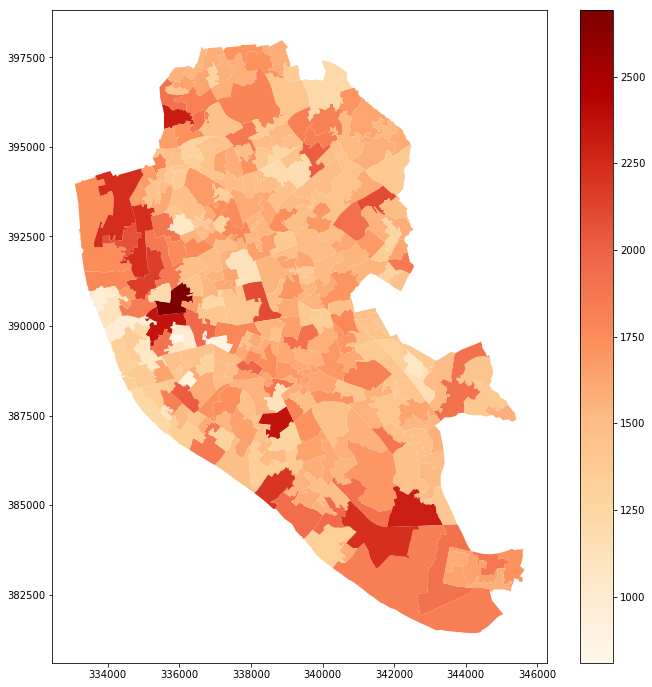

In [110]:
geo_pop.plot(column='target', cmap='OrRd', figsize=(12, 12), legend = True)

## 3.2. Mapping with with Bokeh

Now create a more dynamic map with a continuous variable:

In [111]:
from bokeh.io import output_notebook
from bokeh.models import GeoJSONDataSource, HoverTool, LinearColorMapper
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
output_notebook()

Loading BokehJS ...

In [112]:
geo_source = GeoJSONDataSource(geojson=geo_pop.to_json())

In [113]:
mapper = LinearColorMapper(
    palette='Magma256',
    low=geo_pop["target"].min(),
    high=geo_pop["target"].max()
)

In [114]:
fig = figure()
fig.patches(xs='xs', ys='ys', alpha=0.9, source=geo_source, 
          color={'field': 'target', 'transform': mapper},
         )

GlyphRenderer(id='37c51bf8-890e-4a0a-982e-82f3d14ca32a', ...)

In [115]:
hover = HoverTool(
    point_policy='follow_mouse',
    tooltips='<p><b>target</b>: @target</p><p><b>LSOA11CD</b>: @LSOA11CD</p>'
)

In [116]:
fig.add_tools(hover)

In [117]:
fig.xaxis.visible = True
fig.yaxis.visible = True
fig.grid.visible = True

In [118]:
show(fig)